In [2]:
# Loading the Packages
%reload_ext autoreload
%autoreload 2

# basic packages
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

# data processing packages
import numpy as np

# gaston related packages
import torch
import gaston
from gaston import cluster_plotting, dp_related, model_selection
from gaston import isodepth_scaling
from gaston import process_NN_output

# visualization packages
import matplotlib.pyplot as plt
plt.rcParams.update({
    "pgf.texsystem": "xelatex",      # 使用 XeLaTeX，如果不需要 LaTeX 公式渲染，可以省略
    'font.family': 'serif',          # 字体设置为衬线字体
    'text.usetex': False,            # 禁用 LaTeX，使用 Matplotlib 内置文字渲染
    'pgf.rcfonts': False,            # 禁用 pgf 的默认字体管理
    'pdf.fonttype': 42,              # 确保字体为 TrueType 格式，可被 Illustrator 编辑
    'ps.fonttype': 42,               # EPS 文件也使用 TrueType 格式
    'figure.dpi': 300,               # 设置图形分辨率
    'savefig.dpi': 300,              # 保存的图形文件分辨率
    'axes.unicode_minus': False,     # 避免负号问题
})

In [3]:
if torch.cuda.is_available(): torch.set_default_device('cuda')
else: torch.set_default_device('cpu')
print("Default device:", torch.tensor([1.0]).device)

Default device: cuda:0


In [4]:
# workdir 
BASE_DIR = Path(r'G:\spatial_data')
RUN_ID = '20230523_HCC_PRISM_probe_refined'
src_path = BASE_DIR / 'processed' / f'{RUN_ID}'
analysis_path = BASE_DIR / 'analysis' / f'{RUN_ID}'

# Load one slide exp
segmend_path = src_path / "segmented"
typ_path = analysis_path / "cell_typing"
output_path = analysis_path / "GASTON" / "demo_pc30"
output_path.mkdir(exist_ok=True)

In [5]:
# process GASTON output
gaston_model, A, S= process_NN_output.process_files(output_path / 'model') # model trained above


best model: G:\spatial_data\analysis\20230523_HCC_PRISM_probe_refined\GASTON\demo_pc30\model\rep18


In [6]:
# re-load data
counts_mat = np.load(output_path / 'counts_mat.npy', allow_pickle=True)
coords_mat = np.load(output_path / 'coords_mat.npy', allow_pickle=True)
gene_labels = np.load(output_path / 'gene_labels.npy', allow_pickle=True)
cell_labels = np.load(output_path / 'cell_labels.npy', allow_pickle=True)

Kneedle number of domains: 6


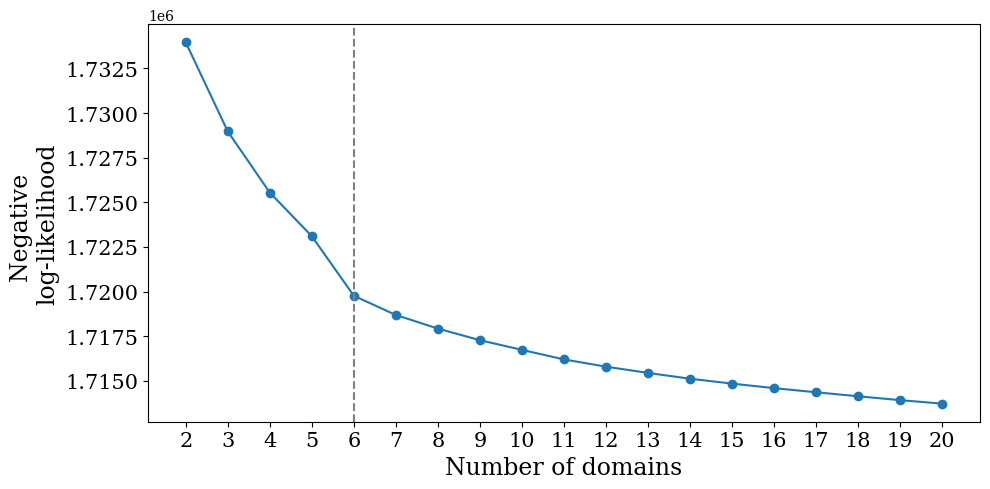

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)
model_selection.plot_ll_curve(gaston_model, A, S, max_domain_num=20, start_from=2, ax=ax)
# plt.savefig(output_path / 'll_curve.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [8]:
# CHANGE FOR YOUR APPLICATION (use number of layers from above)
num_layers = 6
gaston_isodepth, gaston_labels = dp_related.get_isodepth_labels(gaston_model, A, S, num_layers)

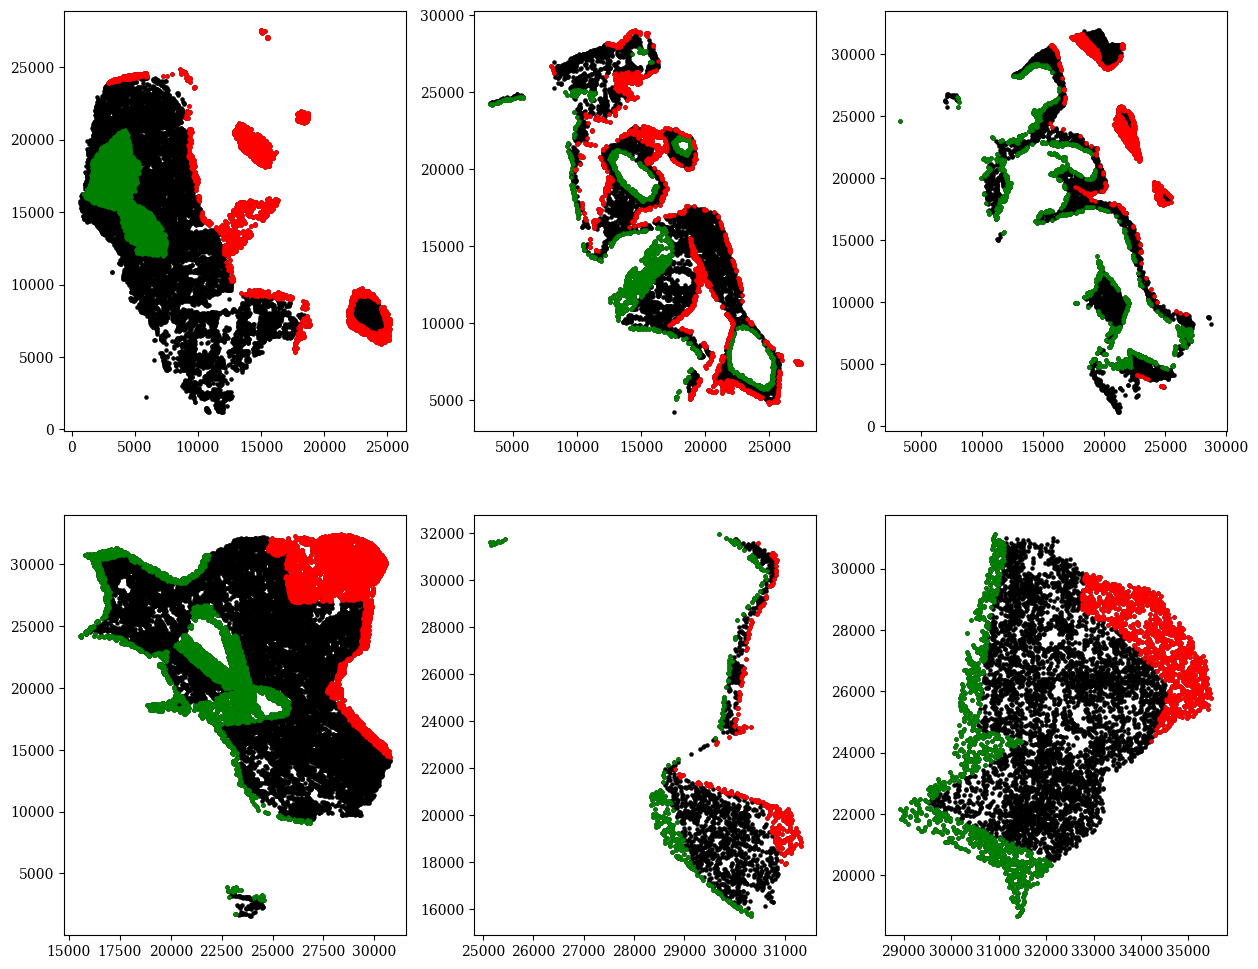

In [9]:
# VISUALIZATION
num_rows = 2
fig, axes = plt.subplots(num_rows, -(-num_layers//num_rows), figsize=(15, 12), dpi=100)
gaston_isodepth, scaling_factors = isodepth_scaling.adjust_isodepth(
    gaston_isodepth, gaston_labels, coords_mat, num_domains=num_layers, # q_vals=[0.1, 0.1, 0.1, 0.05, 0.05, 0.05], 
    scale_factor=0.1625, 
    visualize=True, num_rows=num_rows, return_scaling_factors=True, axs=axes)
# plt.savefig(output_path / f'layer_{num_layers}_scaling_factors.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [ ]:
show_streamlines = True
# linear_transform=np.array([[-1, 0], [0, 1]]) # reflect points across x axis
linear_transform = None

fig, ax = plt.subplots(figsize=(4, 5))
cluster_plotting.plot_isodepth(
    gaston_isodepth, S, gaston_model, 
    streamlines=show_streamlines, s=0.5, 
    scaling_factors=scaling_factors, 
    gaston_labels_for_scaling=gaston_labels, 
    streamlines_lw=2, contour_levels=10, 
    cbar_fs=10, contour_fs=15, 
    linear_transform=linear_transform, ax=ax)
plt.savefig(output_path / f'layer_{num_layers}_isodepth_plot.png', dpi=300, bbox_inches='tight')
plt.close()

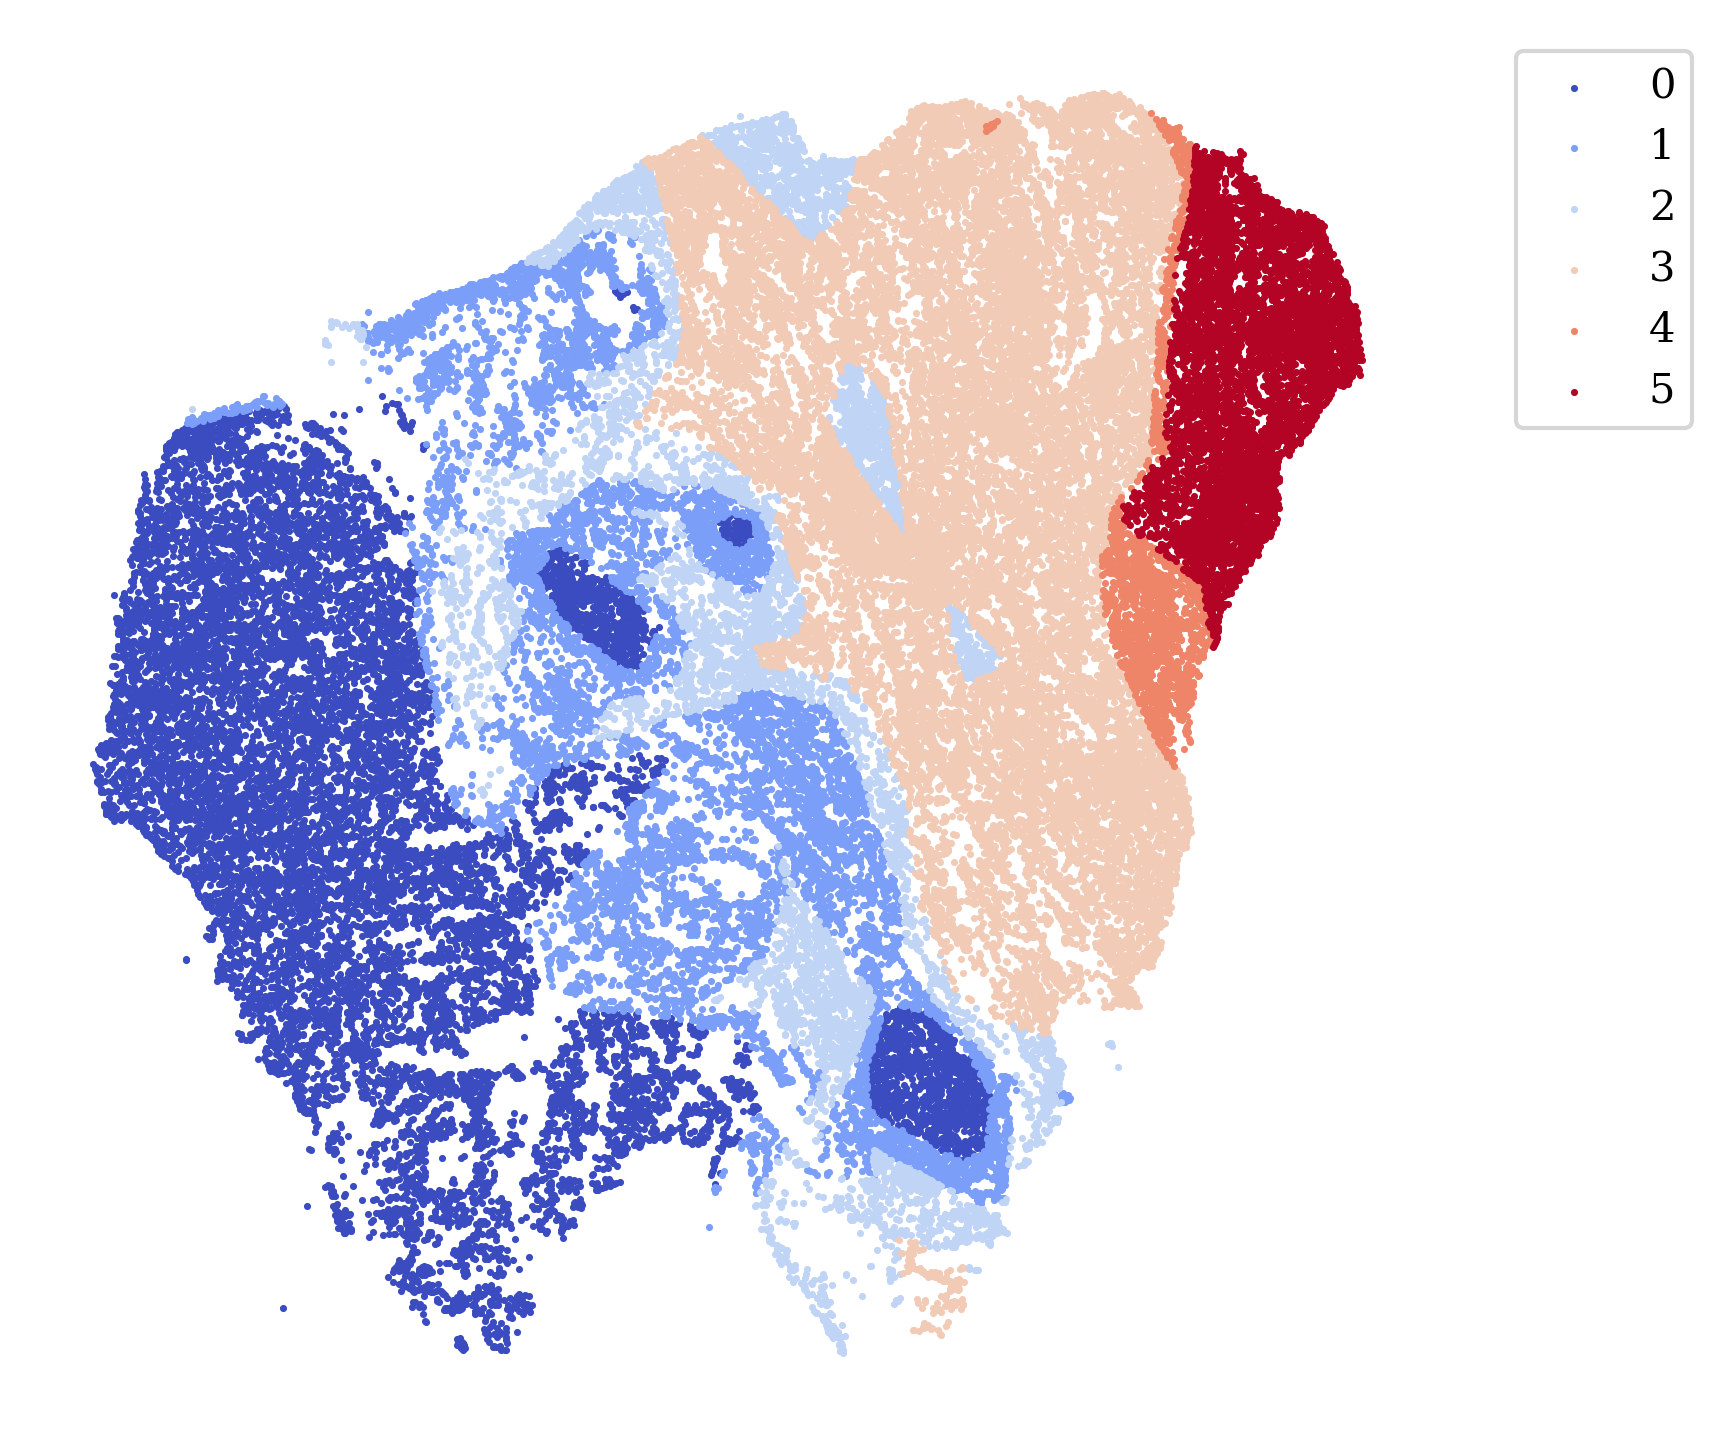

In [20]:
show_streamlines = True
# linear_transform=np.array([[-1, 0], [0, 1]]) # reflect points across x axis
linear_transform = None

fig, ax=plt.subplots(figsize=(6, 6))
cluster_plotting.plot_clusters(
    gaston_labels, S, fig=fig, ax=ax, figsize=(6, 6), s=0.5, lgd=True, color_palette=plt.cm.coolwarm.resampled(num_layers), # color_palette=plt.cm.tab20,
    bbox_to_anchor=(1.05,1), linear_transform=linear_transform)
# plt.savefig(output_path / f'layer_{num_layers}_cluster_plot.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

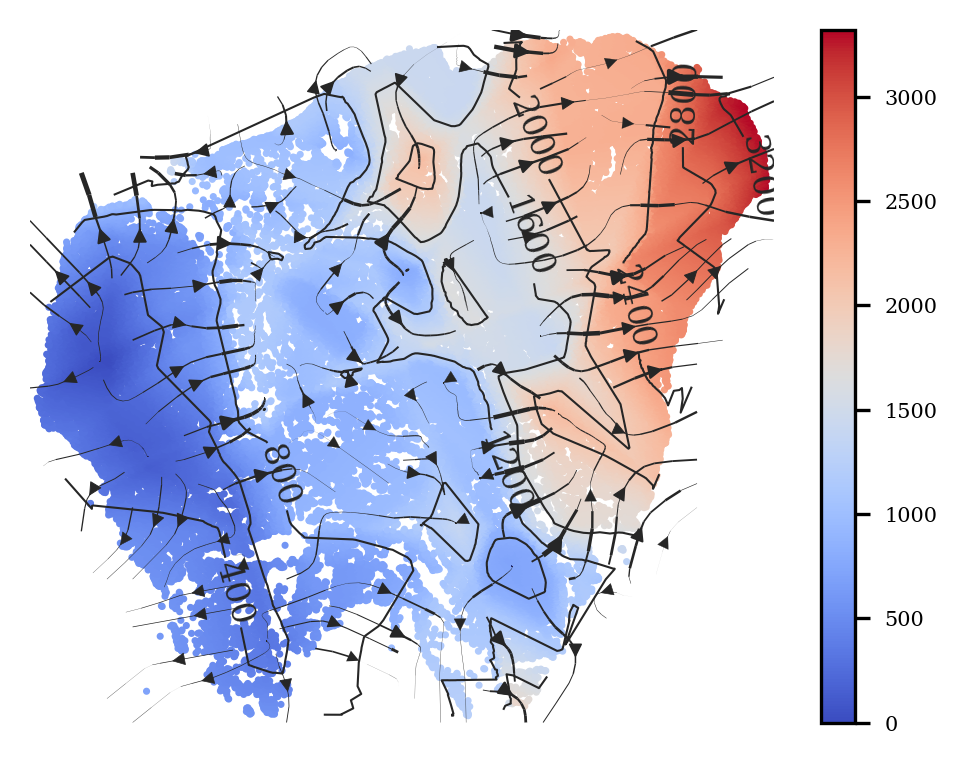

In [26]:
from gaston import cluster_plotting

show_streamlines = True
# linear_transform=np.array([[-1, 0], [0, 1]]) # reflect points across x axis
linear_transform = None

fig, ax = plt.subplots(figsize=(4, 3))
cluster_plotting.plot_isodepth(
    gaston_isodepth, S, gaston_model,  streamlines=show_streamlines, s=0.5, 
    scaling_factors=scaling_factors, 
    gaston_labels_for_scaling=gaston_labels, 
    cbar_fs=5, contour_fs=8, contour_lw=0.5, 
    streamlines_lw=1, contour_levels=10, arrowsize=0.7,
    linear_transform=linear_transform, ax=ax)
plt.savefig(output_path / f'layer_{num_layers}_isodepth_plot.pdf', dpi=100)
# plt.close()
# plt.show()

In [24]:
r, g, b = 0.15, 0.15, 0.15
hex_code = "#{:02X}{:02X}{:02X}".format(
    int(round(r * 255)), 
    int(round(g * 255)), 
    int(round(b * 255))
)
print(hex_code)  # 输出 #B3B3B3

#262626
